# Numerical Methods
## Lecture 5: Ordinary Differential Equations
by: [Tomasz Romańczukiewicz](mailto:tomasz.romanczukiewicz@uj.edu.pl)

*********************************************************

### Outline
- Explicit or implicit
- Higher order methods
- Stability and stiffness
- Other methods (simplectic, split step)
- Two point value problem

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import checkdep_usetex
%matplotlib inline  
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['text.usetex']= checkdep_usetex(True)
plt.rcParams['axes.grid'] = True
#plt.rcParams.keys()

### Ordinary Differential Equations
* Very important in physics (both ODEs and PDEs)
    - classical mechanics
    - quantum mechanics
    - field theory, gravity, fluid dynamics, solids etc ...
* In Finance
    - small closed sectors (demand-supply chain)    
    - stochastic ODEs (ODE + volatility)
    - method of lines for diffusion (Black Scholes equation)
    - difference equations used instead (time is discretized)

* Compound interest 
$$S(t+\Delta t) = S(t) + rS\Delta t + K\Delta t $$
where $S$ is the sum of money, $r$ - interest rate (example 6%/year) and $K$ represents deposite rate. 


In the limit that compounding occurs continuously 

$$\frac{dS}{dt} = rS+K$$

For constant values of $r$ and $K $ we obtain in a long term

$$S(t) = S_0e^{rt} + \frac{e^{rt}-1}{r}K$$

But $r(t)$ is not always constant and $K(t)$ can be vary significantly. Hence better use ODEs and analyse different models (exercise). 

One disadventage: it is impossible to know $r(t)$ and $K(t)$ far into the future!


* price dependence on demand ($D$) and supply ($S$) [About a mathematical model of market](http://iopscience.iop.org/1742-6596/788/1/012024):

$$\dot p =D(p)-S(p_h)$$

where $p_h=p(t-h)$ delayed price and $D, S$ - phenomenological functions, for example:

$$D(p) = \frac{a}{p+c}\;\;\;\;S(p_h)=b-\frac{c}{p_h+c}$$

this technically is not exactly ODE, because of the delay $h$, but standard discretization methods can be applied. Although it may be a problem to use library solvers if they are not dedicated to that type of problem. 

* Lotka-Volterra systems
 -  environment with a single population
$$\frac{dN}{dt} = kN\left(1-\frac{N}{N_{max}}\right)$$ <br> <br> 
where $k$-reproductive rate and $N_{max}$ environment capacity. <br>
Grows or decays stadily to one of two fixed points $N\to0$ for $k<0$ or $N\to N_{max}$ <br> <br> 
 - different polulations:
 
 
 $$\frac{dN_1}{dt} = k_1N_1\left(1-\frac{N_1}{N_{1,max}}+c_1N_2\right)$$
 
 
 $$\frac{dN_2}{dt} = k_2N_2\left(1-\frac{N_2}{N_{2,max}}+c_2N_1\right)$$

Note:
Originally Lotka Volterra equation was introduced to describe predator(foxes $y$)-pray(rabbits $x$) system:
$$
\frac{dx}{dt}=\alpha x-\beta xy
$$

$$
\frac{dy}{dt}=-\gamma y+\delta xy
$$

with all parameters positive. <br>
Without rabbits the foxes would die out.

But with different signs of the parameters we can have cooperation, competitive or dependence models. 





Applications to finance:
 - banks as predators in deposite-loan model (can have also extension including mother bank and subsidiary bank)
 - [unemployment-wages system (Goodwin model)](https://www.deeconometrist.nl/econometrics/lotka-volterra-economic-application/)
 -[ A Lotka–Volterra evolutionary model of China's incremental institutional reform](http://dx.doi.org/10.1080/13504851.2011.579054)
 
 - [Determining firms' utility functions and competitive roles from data on market shares using Lotka–Volterra models](http://dx.doi.org/10.1016/j.dib.2016.03.020) <br>
 a study about the Japanese beer market (1963–2000) !

- Other generalizations: SIR model of pandemics. 

Two types of basic problems:

$$\vec y'=\vec F(t, \vec y), \qquad t\in \mathbb{R}, \qquad \vec y, \vec F\in \mathbb{R}^N$$

* Initial value problem (IVP) $\vec y(t_0)=\vec y_0$ 
    - existence and uniqueness theorem (Lipschitz condition)
    - well tested methods 
* Two point value problem (TPVP) $G_1(t_1, \vec y)=0$ and $G_2(t_2, \vec y)=0$
    - not guaranteed that the solution exists nor it is unique
    - difficult problems 
    - shooting methods
    - algebraic equations

### Example
Consider a two point value problem  (second order equation can be rewritten as a set of two first order equations) $\vec y = (u, u')^T$, 

$$u''+u=0\;\;\; u(0)=1, u(L)=b$$

Solution

$$u(t)=A\cos x+B\sin x,\;\;\; A=1,\;\;\cos L+B\sin L=b$$

* if $L=2n\pi$ and $b=1$ then $B$ is arbitrary
* if $L=2n\pi$ and $b\neq 1$ then problem does not have a solution
* otherwise $$u(x)=\cos x+\frac{b-\cos L}{\sin L}\sin x$$

However, the IVP has always a unique solution

$$u(0)=a, u'(0)=b \qquad\Rightarrow\qquad u(x) = a\cos x + b\sin x$$

If $F(x,\vec y)$ is smooth and has smooth derivatives $\partial F/\partial \vec y$ in a certain vicinity of $x_0$ there exists a neighborhood in which the solution to the IVP $\vec y'=F(x, \vec y)$ with initial condition $\vec y(x_0)=\vec y_0$ exists and is unique.

## Initial value problem
### Euler method

Consider differentiation scheme for an equation $y'(t) = F(t,y)$, $t_n=nh$:

$$y'_n=\frac{y_{n+1}-y_n}{h} + \mathcal{O}(h)$$

from this you can express $y_{n+1}$ in terms of $y_n$:

$$y_{n+1} = y_n+ hF(t_n, y_n)$$

This is an explicit Euler methods<img src="Explicit.jpg" width=200px align="middle">

But one can also do this

$$y'_{n+1}=\frac{y_{n+1}-y_n}{h} + \mathcal{O}(h)$$

and this gives

$$y_{n+1} = y_n+ hF(t_\color{red}{n+1}, \color{red}{y_{n+1}})$$

which is an _equation_ for $y_{n+1}$. It is called implicit Euler method.

#### Example:

Consider $y'= -y$ with a condition gives $y(t)=y(0)e^{-t}$<br>
explicit method gives simply

$$y_{n+1} = (1-h)y_{n} = (1-h)^{n+1}y_0$$

Implicit method gives
$$y_{n+1} = y_{n} - hy_{n+1} \Rightarrow y_{n+1} = \frac{y_n}{1+h}=\frac{y_0}{(1+h)^{n+1}}$$

In [14]:
def show_ODE_example(L):
    t = np.linspace(0, L, 21)
    h = t[1]-t[0]
    y_ex = np.empty(t.size)
    y_im = np.empty(t.size)
    y_ex[0] = y_im[0]  = 1 # initial conditions

    for n, T in enumerate(t[:-1]):
        y_ex[n+1] = y_ex[n] + h *(-y_ex[n])
        y_im[n+1] = y_im[n]/(1 + h)
    plt.title(f'$h={h}$')
    plt.plot(t, y_ex, '-+', label='Explicit method')
    plt.plot(t, y_im, '-o', label='Implicit method')
    plt.plot(t, np.exp(-t), label='Exact solution')
    plt.xlabel('$t$')
    plt.ylabel('$y(t)$')
    plt.legend()
    plt.show()
   
        

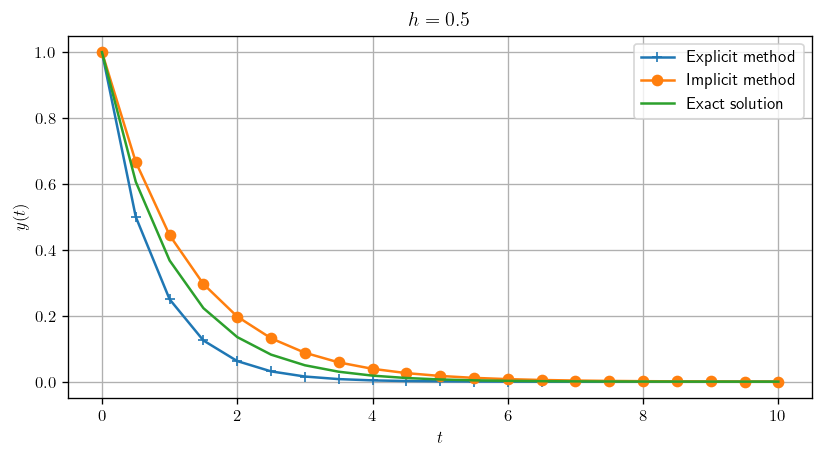

In [15]:
show_ODE_example(10)

### Higher order methods
* One step (Runge-Kutta type) methods<br>
    - a single step consists of smaller, intermediate steps, 
    - each step is independent from previous steps
    - easy to adjust step size (very important)
* Multistep
    - a few previous steps must be known
    - initiation problems (usually with RK)
    - usually faster than RK
    - more difficult to change step size

$$y'\left(t+\frac{h}{2}\right) \approx \frac{y(t+h) - y(t)}{h}+\mathcal{O}(h^2) $$

so

$$y(t+h) = y(t) + hF\left(t+\frac{h}{2}, \color{red}{y\left(t+\frac{h}{2}\right)}\right) $$

But we still don't know $y(t+h/2)$
* explicitly: $y(t+h/2)\approx y(t) + h/2\,F(t, y(t))$
* implicitly: $y(t+h/2)\approx \bigl(y(t)+y(t+h)\bigr)h/2$

* Explicit midpoint rule
$$\begin{aligned}k &= y_n+\frac h2 F(t_n,y_n)\\
y_{n+1} &= y_n + h F\left(t_n+\frac h2, k\right)\end{aligned}$$
* Implicit midpoint rule
$$\begin{aligned}k&=f\left(t_n+\frac h2,y_n+\frac h2 k\right)
\\y_{n+1}&=y_n+h\,k\end{aligned}$$

Local error $\mathcal{O}(h^3)$, total error $\mathcal{O}(h^2)$

This was the simplies examples of the Runge Kutta method. Most popular method is explicit RK4:
$${\displaystyle {\begin{aligned}k_{1}&=h\ F(t_{n},y_{n}),\\k_{2}&=h\ F\left(t_{n}+{\frac {h}{2}},y_{n}+{\frac {k_{1}}{2}}\right),\\k_{3}&=h\ F\left(t_{n}+{\frac {h}{2}},y_{n}+{\frac {k_{2}}{2}}\right),\\k_{4}&=h\ F\left(t_{n}+h,y_{n}+k_{3}\right).\end{aligned}}}$$

$${\displaystyle {\begin{aligned}y_{n+1}&=y_{n}+{\tfrac {1}{6}}\left(k_{1}+2k_{2}+2k_{3}+k_{4}\right),\\t_{n+1}&=t_{n}+h\\\end{aligned}}}$$


* Total error of RK4 is $\mathcal{O}(h^4)$.
* However it is enough to make one more substep to have RK5 with error $\mathcal{O}(h^5)$
* From five steps we can have two approximations $\mathcal{O}(h^4)$ and $\mathcal{O}(h^5)$ so we can 
    - find even higher approximation
    - control error (usually denoted as RK45 method)
    - if local error is larger than a bound the step size is decreased
    - RK method approximate solution with high order polynomial (dense output)

### Multistep methods 
#### Explicit (Adams–Bashforth method)

$${\displaystyle {\begin{aligned}
y_{n+2}&=y_{n+1}+h\left({\frac {3}{2}}F(t_{n+1},y_{n+1})-{\frac {1}{2}}F(t_{n},y_{n})\right),\\
y_{n+3}&=y_{n+2}+h\left({\frac {23}{12}}F(t_{n+2},y_{n+2})-{\frac {16}{12}}F(t_{n+1},y_{n+1})+{\frac {5}{12}}F(t_{n},y_{n})\right),\\
\end{aligned}}}$$

More useful for solving PDE with fixed step

#### Implicit (Adams–Moulton methods)

$${\displaystyle {\begin{aligned}y_{n+2}&=y_{n+1}+h\left({\frac {5}{12}}F(t_{n+2},y_{n+2})+{\frac {2}{3}}F(t_{n+1},y_{n+1})-{\frac {1}{12}}F(t_{n},y_{n})\right),\\
y_{n+3}&=y_{n+2}+h\left({\frac {9}{24}}F(t_{n+3},y_{n+3})+{\frac {19}{24}}F(t_{n+2},y_{n+2})-{\frac {5}{24}}F(t_{n+1},y_{n+1})+{\frac {1}{24}}F(t_{n},y_{n})\right).\end{aligned}}}$$


#### Implicit Gear methods (for heavy duty)
$${\displaystyle y_{n+2}-{\frac {4}{3}}y_{n+1}+{\frac {1}{3}}y_{n}={\frac {2}{3}}hF(t_{n+2},y_{n+2})}$$
$$ y_{n+3} - \frac{18}{11} y_{n+2} + \frac9{11} y_{n+1} - \frac2{11} y_n = \frac6{11} h F(t_{n+3}, y_{n+3}) $$

Most universal solver: LSODE (Livermore Solver for Ordinary Differential Equations):
- adaptive step
- chooses methods
- Adams methods (predictor (Adams-Moulton) - corrector (Adams-Bashforth)) for non-stiff
- Gear methods (implicit backward diff)
- for implicit methods jacobian is used (for multidimentional Newton method)

### Stability
When solving equation $y'=F(y)$ we can expand $F$ in a Taylor series

$$y'=F(y_n) + (y-y_n) F'(y_n) +\ldots$$

Since $y'_n=F(y_n)$, we can linearize the equation by introducing $\tilde y=y-y_n$

$$ \tilde y'=F'(y_n) \tilde y$$

For simplicity we drop $\tilde{}$ from now on.

The method is <font color="red">absolutely stable</font> if for equation $y'=\lambda y$ the solution tends to 0: $y_n\to 0$ as $n\to\infty$.

In [3]:
def test_method_stability(F):
    xlist = np.linspace(-3.0, 3.0, 100)
    ylist = np.linspace(-3.0, 3.0, 100)
    X, Y = np.meshgrid(xlist, ylist)
    λ = X+Y*1j
    Z = np.abs(F(-λ))   
    levels = np.linspace(0, 1, 6)
    contour = plt.contour(X, Y, Z, levels, colors='k')

    contour_filled = plt.contourf(X, Y, Z, levels)


    plt.title('Stability of '+F.__name__)
    plt.xlabel('Re $\lambda h$')
    plt.ylabel('Im $\lambda h$')

In [4]:
def Euler_explicit(λ): return (1- λ)
def Euler_implicit(λ): return 1/(1+ λ)
def explicit_midpoint(λ): return 1-λ+λ**2/2
def implicit_midpoint(λ): return (1-λ/2)/(1+λ/2)

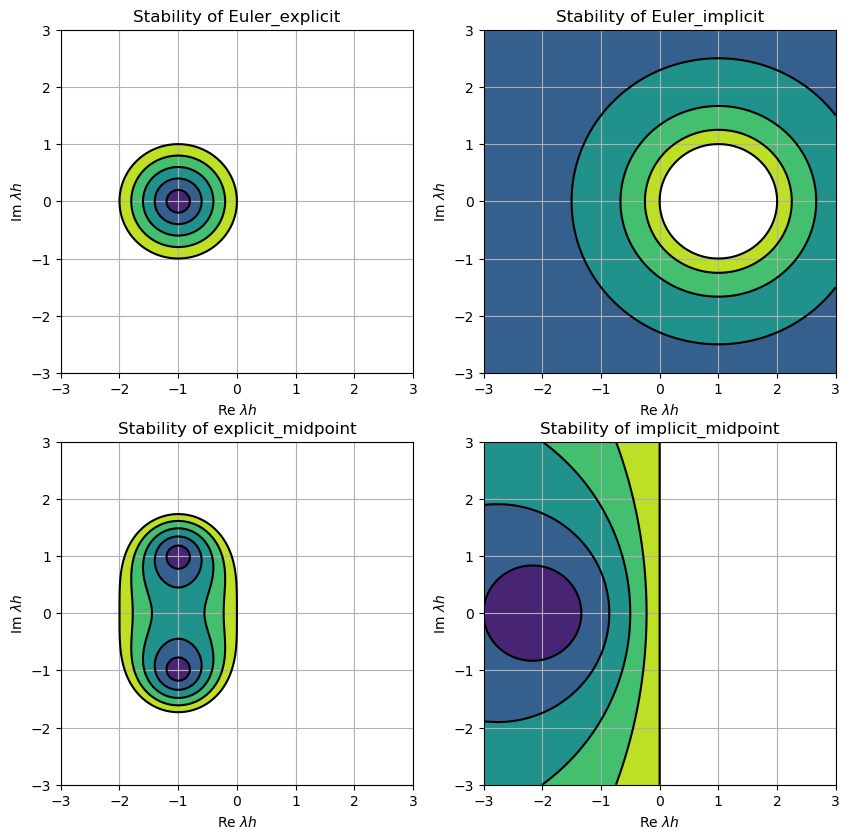

In [8]:
plt.figure(figsize=(10, 10), dpi=100)

for (n, method) in enumerate([Euler_explicit, Euler_implicit, explicit_midpoint, implicit_midpoint]):
    plt.subplot(2, 2, n+1)
    test_method_stability(method)

plt.show()

In [5]:
xlist = np.linspace(-4.0, 4.0, 500)
ylist = np.linspace(-4.0, 4.0, 500)
X, Y = np.meshgrid(xlist, ylist)
λ = X+Y*1j
Λ = λ.flatten()
Λ.shape
#print(Λ)

(250000,)

In [6]:
def test_f(t, y): 
    #print("Caylculating: t = ", t, "y=", y)
    return Λ*y

def check_scipy_solvers(Method):
    t_span = (0, 1)
    y0 = np.ones(Λ.shape, dtype=complex)

    import scipy.integrate
    res = scipy.integrate.solve_ivp(test_f, t_span, y0, method=Method, atol = 1e8, first_step=1)
    z = res.y[:,1]
    Z = z.reshape(λ.shape)
    Z = np.abs(Z)
    plt.grid(True)
    levels = np.linspace(0, 1, 6)
    contour = plt.contour(X, Y, Z, levels, colors='k')
    contour_filled = plt.contourf(X, Y, Z, levels)
    plt.title('Stability of ' + Method)
    plt.xlabel('Re $\lambda h$')
    plt.ylabel('Re $\lambda h$')

plt.show()

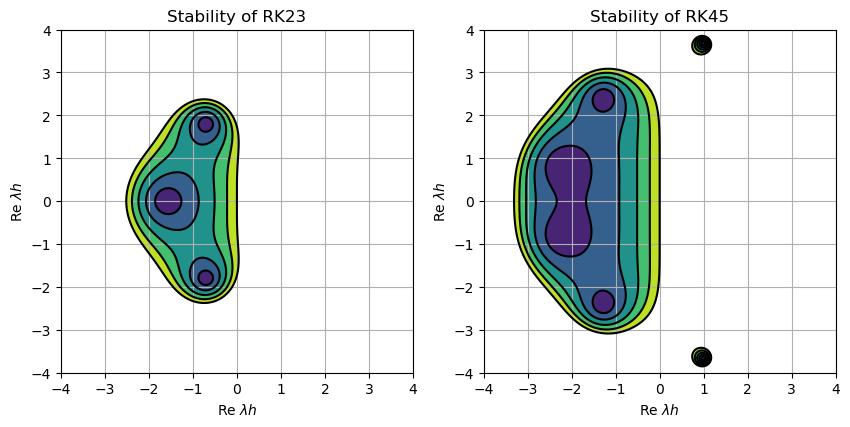

In [11]:
 plt.figure(figsize=(10, 10), dpi=100)

for (n, method) in enumerate(['RK23', 'RK45']):
    plt.subplot(2, 2, n+1)
    check_scipy_solvers(method)

plt.show()

#### Back to our example:

Consider $y'= \lambda y$ with a condition gives $y(t)=y(0)e^{\lambda t}$<br>
explicit method gives simply

$$y_{n+1} = (1+\lambda h)y_{n} = (1+\lambda h)^{n+1}y_0$$
The explicit method is stable when 

$$|1+\lambda h|<1$$

Implicit method gives
$$y_{n+1} = y_{n} -\lambda hy_{n+1} \Rightarrow y_{n+1} = \frac{y_n}{1-\lambda h}=\frac{y_0}{(1-\lambda h)^{n+1}}$$

The implicit method is stable when 

$$\frac{1}{|1-\lambda h|}<1$$

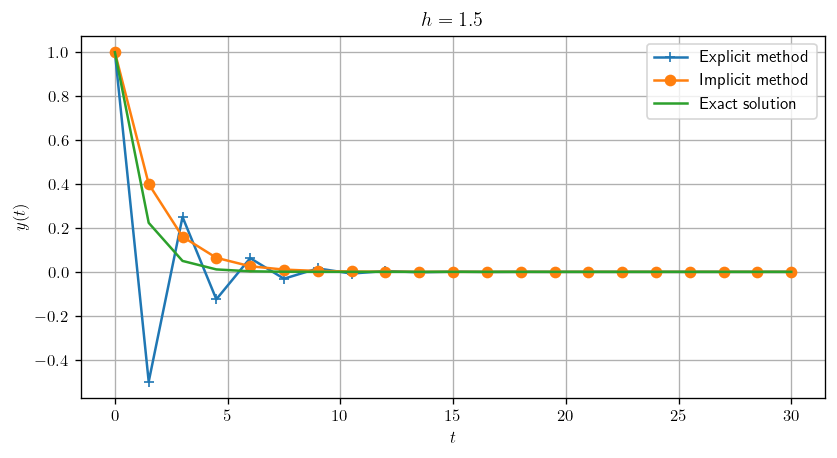

In [16]:
show_ODE_example(30)

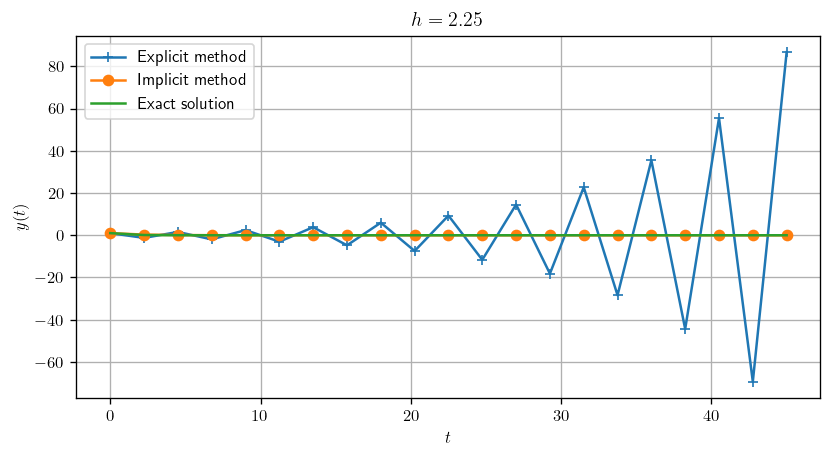

In [18]:
show_ODE_example(45)

### Stiff equations
* In general, the system of ODEs can have many eigenvalues. 
* small $|\lambda|$ determine the long-time evolution $\sim e^{-\lambda t}$
* large $|\lambda|$ quickly decay (are not visible in evolution)
* large $|\lambda|$ destabilize the solution, so the time step has to be adjusted to the largest $|\lambda|$
* equations with large ratio $|\lambda|_{max}/|\lambda|_{min}$ are notoriously difficult to solve (stiff)

#### Example of a stiff problem:
$$
\vec y'= \left(\begin{array}{cc}
-501& 500\\
500& -501
\end{array}\right)\vec y
$$

#### Exercise: 
solve the above problem using explicit Euler method with $\vec y_0=(1, 0)^T$ for $t\in [0,10]$. 

For diffusion equations 
$$u_{t} = u_{xx}+F(t, x, u)=0$$

* discretization in $x$ gives the highest eigenvalue $u~\sim \sin(\pi x/(dx))\Rightarrow |\lambda|_{max}\sim(dx)^{-2}$
* the physical domain give the lowest eigenvalue $u~\sim \sin(\pi x/L)\Rightarrow |\lambda|_{min}\sim(L)^{-2}$
* the stiffness parameter is controlled by the number of points $N^2=(L/dx)^2$

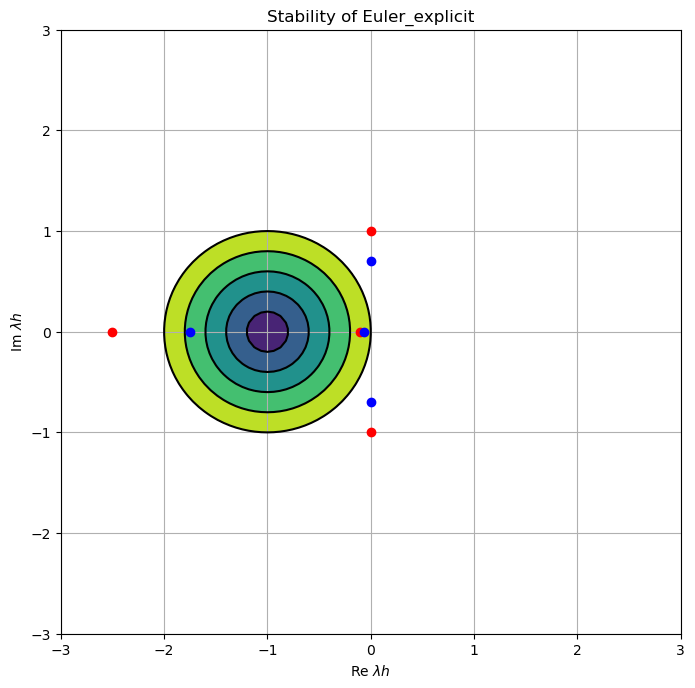

In [12]:
plt.figure(figsize=(8, 8), dpi=100)
rel = np.array([-0.1, -2.5,  0, 0])
iml = np.array([0, 0, -1, 1])
plt.plot(rel, iml, "ro")
plt.plot(rel*0.7, iml*0.7, "bo")
test_method_stability(Euler_explicit)

### Example: 
let us solve the following nonlinear ODE
$$y'=\sin(y)$$
using three different methods: explicit Euler
$$y_{n+1}=y_n+h\sin(y_n)$$
and implicit Euler method 
$$y_{n+1}=y_n+h\sin(y_{n+1})$$
but solving the underlying equation for $y_{n+1}$ using two methods:
a naive iteration <br>

$$y_{n+1}^{(k+1)}=y_{n+1}+h\sin(y_{n+1}^{(k)})$$ 


with initial guess $y_{n+1}^{(0)}=y_n$ <br>
and Newton method. 

The equation for $y_{n+1}$ can be written:
$$F(y_{n+1})=y_n+h\sin(y_{n+1})-y_{n+1}$$ 
hence the Newton iteration
$$y_{n+1}^{(k+1)}=\frac{y_n+h\sin(y_{n+1})-y_{n+1}}{h\cos(y_{n+1})-1}$$

From initial condition $y(0)=1$ the solution should tend monotonically $y(x\to\infty)\to\pi$.

In [27]:
N = 10
x = np.linspace(0,10, N)
y = np.zeros(N)
y[0] = 1
h = x[1]-x[0]
# explicit method 
for n in range(N-1):
    y[n+1] = y[n] + h*np.sin(y[n])
y_explicit = y.copy()    

In [28]:
y[0] = 1
for n in range(N-1):
    """
        solve y[n+1] = y[n] + h*np.sin(y[n+1])
        F(y[n+1]) = y[n] + h*np.sin(y[n+1]) - y[n+1]
    """
    y[n+1] = y[n]
    k = 0
    for k in range(20):
        u = y[n] + h*np.sin(y[n+1])
        dy = abs(y[n+1]-u)
        y[n+1] =  u
        if(abs(dy)<1e-10): break
    #print(k)
y_implicit1 = y.copy()

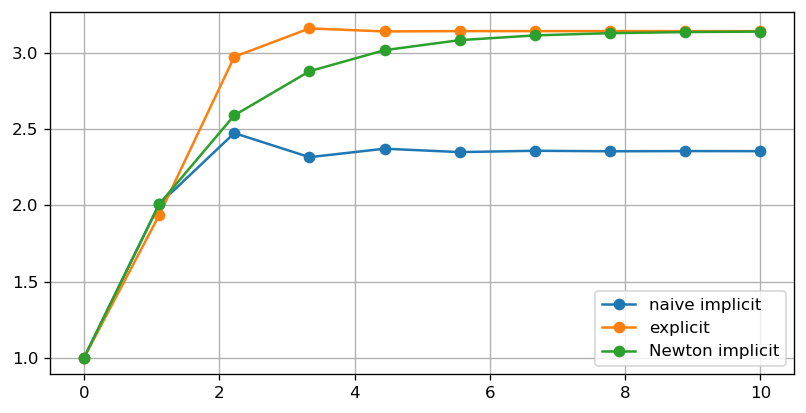

In [32]:
# implicit method 
y[0] = 1
for n in range(N-1):
    """
        solve y[n+1] = y[n] + h*np.sin(y[n+1])
        F(y[n+1]) = y[n] + h*np.sin(y[n+1]) - y[n+1]
    """
    y[n+1] = y[n]
    k = 0
    for k in range(8):
        F = y[n] + h*np.sin(y[n+1]) - y[n+1]
        dF = h*np.cos(y[n+1]) - 1
        dy = F/dF
        y[n+1] -=  dy
        if(abs(dy)<1e-10): break
    #print(k)
    # y[n+1] = y[n] + h*np.sin(y[n])
    
plt.grid(True)    

plt.plot(x,y_implicit1, "-o", label="naive implicit")  
plt.plot(x,y_explicit, "-o", label='explicit')  
plt.plot(x,y, "-o", label='Newton implicit')  
plt.legend()


In [33]:
plt.show()

In the naive method we solve the equation be iteration:
$$y_n^{(k+1)}=y_n+hF\left(y_n^{(k)}\right)$$
This method converges when 

$$\left|hF'\left(y_n^{(k+1)}\right)\right|<1$$

Which is equivalent to $|\lambda h|<1$ which is the stability convergence for _explicit_ method.

#### Example:
Second order equation
$$y''+y=0$$
can be solved directly using
$$y_n''\approx \frac{y_{n-1}-2y_n+y_{n+1}}{h^2}$$
which lead to a multistep scheme
$$y_{n+1} = -y_{n-1}+2y_n-h^2 y_{n}$$

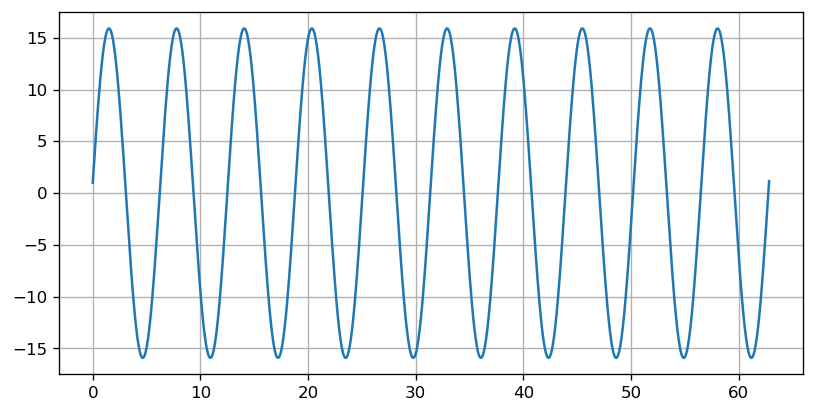

In [34]:
t = np.linspace(0, 20*np.pi, 1000)
h2 = (t[1]-t[0])**2
y = np.empty(t.size)
y[0] = y[1] = 1
for n, T in enumerate(t[1:]):
    y[n+1] = -y[n-1] + (2-h2)*y[n]
    
plt.plot(t, y)
plt.show()

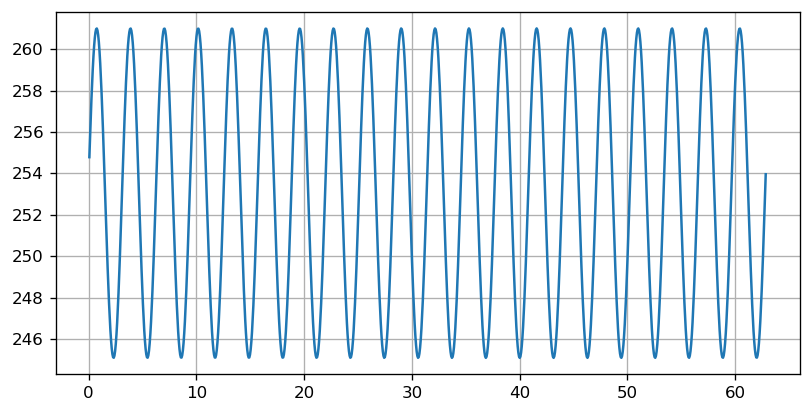

In [35]:
E = (y[1:]-y[:-1])**2/h2 + y[1:]**2
plt.plot(t[1:], E)

Or it can be transformed into a system of two equations $u=(y, y')$

$$
\vec u'= \left(\begin{array}{cc}
0& 1\\
-1& 0\end{array}\right)\vec u = M\vec u
$$
Explicit Euler method gives
$$\vec u_{n+1}=(\mathbb{1}+hM)\vec u_n$$
Implicit Euler method gives
$$\vec u_{n+1}=(\mathbb{1}-hM)^{-1}\vec u_n$$

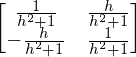

In [36]:
import sympy as sp
sp.init_printing(use_unicode=True)
h = sp.symbols('h')
A = sp.Matrix([[1, h], [-h, 1]])
B = sp.Matrix([[1, -h], [h, 1]])
B.inv()

In [37]:
t = np.linspace(0, 10*np.pi, 1000)
h = (t[1]-t[0])
u_exp = np.empty([t.size, 2])
u_exp[0, :] = np.array([1, 0])

for n, T in enumerate(t[1:]):
    u_exp[n+1, 0] = u_exp[n, 0] + h*u_exp[n, 1]
    u_exp[n+1, 1] = u_exp[n, 1] - h*u_exp[n, 0]    

In [44]:
u_imp = np.empty([t.size, 2])
u_imp[0, :] = np.array([1, 0])
fac = (1+h*h)
for n, T in enumerate(t[1:]):
    u_imp[n+1, 0] = (u_imp[n, 0] + h*u_imp[n, 1])/fac
    u_imp[n+1, 1] = (u_imp[n, 1] - h*u_imp[n, 0])/fac

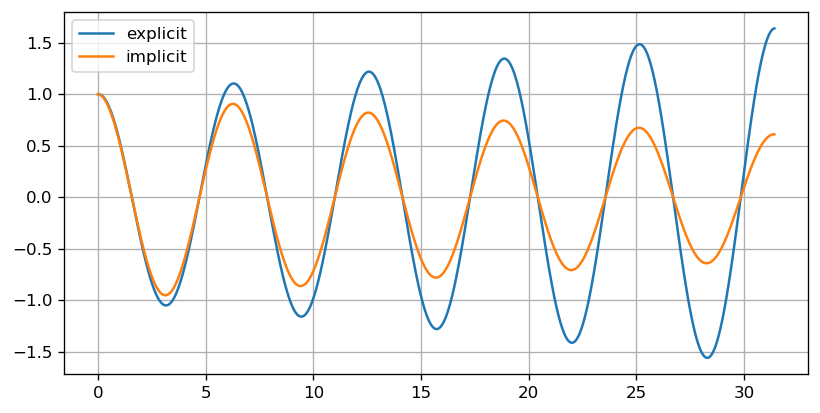

In [39]:
plt.plot(t, u_exp[:, 0], label='explicit')
plt.plot(t, u_imp[:, 0], label='implicit')
plt.legend()

* Explicit method is unstable (blows up) - energy is increasing
* Implicit method is stable - energy is decreasing

For hamiltonian systems energy = volume in the phase space $(y, y')$<br>
Explicit Euler method is a map  maps: $\vec u_n\to \vec u_{n+1}=A\vec u_n=(\mathbb{1}+hM)\vec u_n$<br>
Implicit Euler method is a map  maps: $\vec u_n\to \vec u_{n+1}=B\vec u_n=(\mathbb{1}-hM)^{-1}\vec u_n$<br>

In [40]:
A.det()

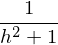

In [41]:
B.inv().det().simplify()

Volume space increases in explicit methods and decreases for implicit

### Symplectic methods for hamiltonian systems

Update velocity from updated position
$$u_{n+1, 0} = u_{n, 0} + h\,u_{n, 1}$$

$$u_{n+1, 1} = u_{n, 1} - h\,u_{n+1, 0}$$

Or equivalently composition of two maps:
$$\vec u_{n+1}=\left(\begin{array}{cc}
1& h\\
0& 1\end{array}\right)
\left(\begin{array}{cc}
1& 0\\
-h& 1\end{array}\right)
\vec u_{n}=M_1(h)M_2(h)\vec u_n$$

In [42]:
h = t[1]-t[0]
u_sym = np.empty([t.size, 2])
u_sym[0, :] = np.array([1, 0])
for n, T in enumerate(t[1:]):
    u_sym[n+1, 0] = u_sym[n, 0] + h*u_sym[n, 1]
    u_sym[n+1, 1] = u_sym[n, 1] - h*u_sym[n+1, 0]

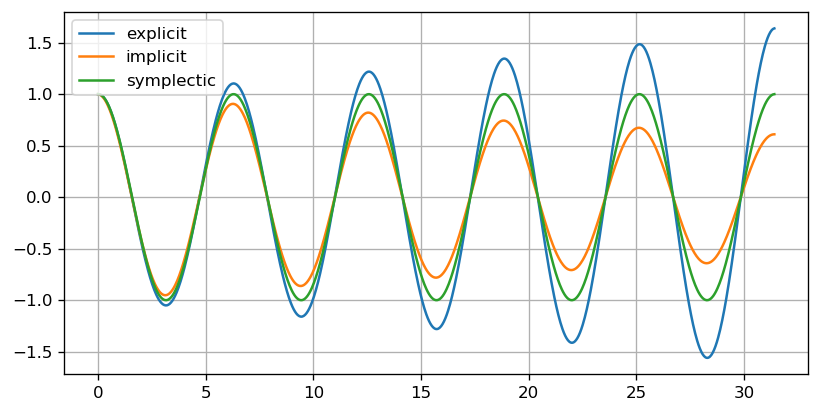

In [43]:
plt.plot(t, u_exp[:, 0], label='explicit')
plt.plot(t, u_imp[:, 0], label='implicit')
plt.plot(t, u_sym[:, 0], label='symplectic')
plt.legend()

Symplectic method preserve energy (or closely related quantity)
$$\vec u_{n+1}=
\left(\begin{array}{cc}
1& 0\\
-h& 1\end{array}\right)
\left(\begin{array}{cc}
1& h\\
0& 1\end{array}\right)
\vec u_{n}=M_2(h)M_1(h)\vec u_n$$
where obviously 
$\det M_1=\det M_2=1$
But they loose this property when the step size is changed
they can be used only for conserved systems.

Higher order methods can be used

$$\vec u_{n+1}=M_1\left(\frac h2\right)M_2(h)M_1\left(\frac h2\right)\,\vec u_{n}$$

Symplectic (geometric) integrators can be applied for hamiltonian systems: $H = H(p, q)=T(P)+V(q)$
and hamiltonian equations<br><br>



$$\begin{aligned}
\frac{dp}{dt} &= -\frac{\partial H(p, q)}{dq}=-\frac{dV(q)}{dq}\\
\\
\frac{dq}{dt} &= \frac{\partial H(p, q)}{dp}=\frac{dT(p)}{dp}
\end{aligned}$$

### Split step method
Formally $y'=H(t, y)y$ can be solved using the relation

$$y(t)=e^{\int H dt}$$

For very stiff systems if $H$ can be easily separated as 

$$H=O^TH_1O + H_2$$

where $H_1$ and $H_2$ are diagonal and $O$ is orthogonal (or unitary)  one can use a split-step method

$$y_{n+1}\approx e^{(O^TH_1O + H_2)h}y_{n}\approx Oe^{H_1h}O^Te^{H_2h}y_{n}$$

This method is often used for solving time-dependent Schroedinger equation, but can be used for diffusion as well.

### Two point value problems
Examples:
1.   $\;\;\;\displaystyle y''=2 y (y^2-1)\,, \qquad y(0) = 0,\, y(\infty)\approx y(L)=1$<br><br>
    
1. Eigenvalue problem (find $\omega$) $\;\;\;\displaystyle -y''+\left(4-\frac{6}{\cosh^2x }\right)y=\omega^2 y\,,\qquad y(0)=1,\,y'(0)=0,\, y(\infty)\approx y(L)=0$ <br>or $y'(0)=0,\,y'(0)=1,\, y(\infty)\approx y(L)=0$



One can adopt a shooting method:
1. Define a function $g(a)$ which maps initial problem $y(0), y'(0)=a$ to a difference from the second condition $g(a)=y(L)-1$
1. Find zero of $g(a)$

Note: Solutions of the ODE can diverge exponentially fast 

$$|\delta y(L)|\approx |\delta y(0)|\,e^{\lambda L},$$

where $\lambda$ is a Lyapunov exponent.<BR>
Sometimes some modifications of the original problem are required to decrease the Lyapunov exponent.<br>
For example change equation to $y''=0$ when $|y|>10$

* One can also shoot from both ends to some point in the middle - more difficult but better.

* Often better: discretize the equation and solve a huge system of algebraic equations (linear or nonlinear). Use sparse matrix solvers.

* Best: use spectral methods (and full matrices). 

## Summary

1. ODEs: IVP vs TPVP (solution doesn't need to exist).
1. Explicit (easier and faster) vs implicit (more difficult but more stable).
1. High order methods
    * one step (RK)
    * multistep
1. Stiff equations are difficult to solve and require implicit methods   
1. Some problems require dedicated methods (simplectic for long evolution of conservative systems)

## Tasks

1. Implement explicit and implicit method for $y'=-y^2$, $y(0)=1$ for $x\in[0,10]$.
1. Solve the  problem $$
\vec y'= \left(\begin{array}{cc}
-501& 500\\
500& -501
\end{array}\right)\vec y
$$<br><br>
using explicit Euler (and implicit) method with $\vec y_0=(1, 0)^T$ for $t\in [0,10]$. 
1. Introduce a damping term $\gamma y'$ to the harmonic oscillator equation $y''+y=0$  to compensate the energy growth to use with explicit Euler method. Draw the energy as a function of time. 

4. Solve at least one of the two point value problems from the examples a few slides before. 
5. Implement RK4 method. 
6. Solve a diffusion equation<br><br>
$$u_t=u_{xx}$$<br><br>
using a three-point or five-point stencil to discretize the spatial derivatives (and transform a PDE into a system of ODEs in time). use your favorite method to solve the time dependent problem for boundary conditions
$$u(x, t=0) = \sin\left(\frac{\pi x}{L}\right)\,,\qquad u(0, t)=u(L,t) = 0$$